# Requirements

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [5]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [7]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [8]:
# Print the page source code.
# print(browser.page_source)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [13]:
# Write your code here.
data = []

In [14]:
# Add as many code boxes as you need.
for i in range(25):
    row = browser.find_element(By.CSS_SELECTOR, f'table tbody tr:nth-of-type({i+1})')
    name = row.find_element(By.CSS_SELECTOR, 'td:nth-child(2) div').get_attribute("title")
    price = row.find_element(By.CSS_SELECTOR, 'td:nth-child(4) span').text
    market_cap = row.find_element(By.CSS_SELECTOR, 'td:nth-child(7) span').text
    data.append({
            "Name": name, 
            "Price": float(price.replace(",", "").replace("$", "")),
            "Market Cap": market_cap})
    
browser.quit()
df = pd.DataFrame(data)
print(df.head(25))

                   Name         Price Market Cap
0           Bitcoin USD  70124.370000     1.387T
1          Ethereum USD   2475.420000   298.082B
2       Tether USDt USD      0.999600   120.453B
3               BNB USD    569.620000    82.081B
4            Solana USD    167.620000    78.935B
5          USD Coin USD      1.000000    35.191B
6               XRP USD      0.512881    29.167B
7          Dogecoin USD      0.177114    25.976B
8   Lido Staked ETH USD   2467.040000    24.047B
9      Wrapped TRON USD      0.161674    14.134B
10             TRON USD      0.162092    14.012B
11          Toncoin USD      4.669300     11.88B
12          Cardano USD      0.334905     11.72B
13      Lido wstETH USD   2905.500000      10.9B
14        Shiba Inu USD      0.000018     10.83B
15  Wrapped Bitcoin USD  69407.980000    10.203B
16        Avalanche USD     24.040000     9.789B
17             WETH USD   2452.610000     8.278B
18     Bitcoin Cash USD    343.480000     6.795B
19        Chainlink 

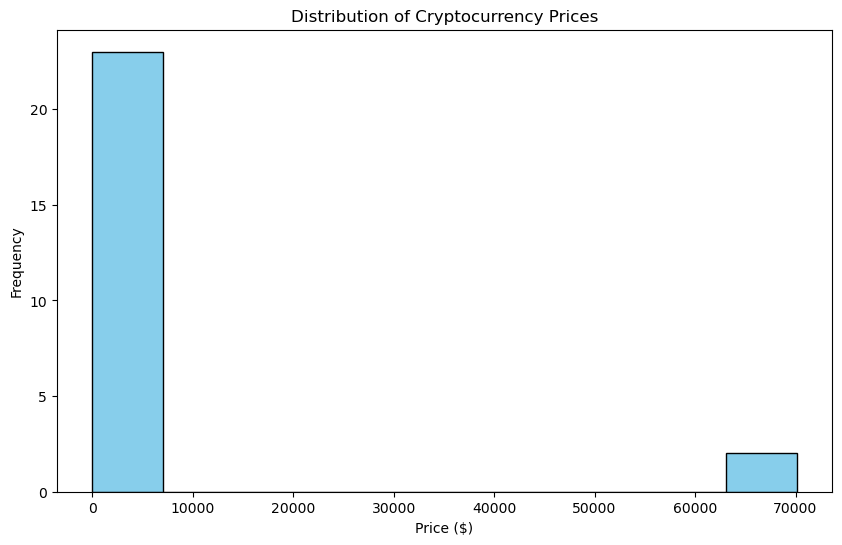

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Cryptocurrency Prices')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [7]:
import time

In [9]:
# Write your code here.
browser.get('https://finance.yahoo.com/crypto')

try:
    time.sleep(2)
    btc_row = browser.find_element(By.CSS_SELECTOR, "#\\30  > td:nth-child(1) > span > div > a")
    btc_row.click()
except Exception as e:
    print("Couldn't find BTC-USD row:", e)
    browser.quit()
    exit()

try:
    time.sleep(3)
    historical_data_tab = browser.find_element(By.CSS_SELECTOR, "#nimbus-app > section > section > aside > section > nav > ul > li:nth-child(5) > a > span")
    historical_data_tab.click()
except Exception as e:
    print("Couldn't click on Historical Data tab:", e)
    browser.quit()
    exit()

time.sleep(5)

history_data = []
try:
    rows = browser.find_elements(By.CSS_SELECTOR, "table tbody tr")
    for row in rows:
        date = row.find_element(By.CSS_SELECTOR, "td:nth-child(1)").text
        close_price = row.find_element(By.CSS_SELECTOR, "td:nth-child(5)").text
        market_cap = row.find_element(By.CSS_SELECTOR, "td:nth-child(7)").text

        history_data.append({
            "Date": date,
            "Close Price": float(close_price.replace(",", "")),
            "Market Cap": market_cap
        })
except Exception as e:
    print("Error extracting historical data:", e)

browser.quit()


In [ ]:
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

In [ ]:
# Add as many code boxes as you need.
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Close Price"], label="BTC-USD Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.title("BTC-USD Historical Close Prices")
plt.legend()
plt.show()